## Assignment 4 - MGOD30, Business Data Analytics, Summer 2021

## Accountable Receivable Analysis

You are a business manager hired to analyze real data on accounts receivable for a two-year period at a firm. The firm would like to get further insights on the invoice amounts, how often they were late, and whether they were disputed. They also would like to know more how data analytics could be an useful tool for their process. Results will be presented in financial meetings with the CEO and CFO at the company. 

Please answer the following managerial questions in the appropriate cells below. Your analysis, plots, and predictive models will help managers gain insights and improve their decision-making process.

This is a real dataset provided by an Informations Technology firm that offers international services across many countries. It is composed by the following columns:

- <i>countryCode</i>: country code of the customer the invoice refers to;
- <i>customerID</i>: customer unique identifier;
- <i>invoiceNumber</i>: invoice unique identifier;
- <i>InvoiceDate</i>: invoice date;
- <i>InvoiceAmount</i>: total amount of the invoice;
- <i>Disputed</i>: if the invoice was disputed by the customer;
- <i>PaperlessBill</i>:	if the invoice was done by paper or electronic;
- <i>DaysLate</i>: days the invoice payment is late (empty if zero).

This assignment is worth <i>7 (out of 25) points.</i> Recall to answer both quantitative and qualitative questions.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Data Reading

In [2]:
# Read data
dfInvoice = pd.read_csv("accounts.csv")
dfInvoice.head(5)

,countryCode,customerID,invoiceNumber,InvoiceDate,InvoiceAmount,Disputed,PaperlessBill,DaysLate
0,391,0379-NEVHP,611365,1/2/2013,55.94,No,Paper,1.0
1,406,8976-AMJEO,7900770,1/26/2013,61.74,Yes,Electronic,6.0
2,391,2820-XGXSB,9231909,7/3/2013,65.88,No,Electronic,2.0
3,406,9322-YCTQO,9888306,2/10/2013,105.92,No,Electronic,5.0
4,818,6627-ELFBK,15752855,10/25/2012,72.27,Yes,Paper,4.0


In [3]:
dfInvoice.describe()

,countryCode,invoiceNumber,DaysLate
count,2466.000000,2.466000e+03,882.000000
mean,620.446067,4.978431e+09,9.632653
std,215.933610,2.884272e+09,7.142063
min,391.000000,6.113650e+05,1.000000
25%,406.000000,2.528854e+09,4.000000
50%,770.000000,4.964228e+09,8.000000
75%,818.000000,7.494512e+09,14.000000
max,897.000000,9.990244e+09,45.000000


# Data Cleaning

In [4]:
dfInvoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   invoiceNumber  2466 non-null   int64  
 3   InvoiceDate    2466 non-null   object 
 4   InvoiceAmount  2463 non-null   object 
 5   Disputed       2466 non-null   object 
 6   PaperlessBill  2466 non-null   object 
 7   DaysLate       882 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 154.2+ KB


We have been told that nan values in Days Late show no Delay. So we can replace the nan values in DaysLate with 0

In [5]:
dfInvoice.DaysLate=dfInvoice.DaysLate.fillna(0)

In [6]:
dfInvoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   invoiceNumber  2466 non-null   int64  
 3   InvoiceDate    2466 non-null   object 
 4   InvoiceAmount  2463 non-null   object 
 5   Disputed       2466 non-null   object 
 6   PaperlessBill  2466 non-null   object 
 7   DaysLate       2466 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 154.2+ KB


Now lets handle Null values in InvoiceAmount

In [7]:
dfInvoice.dtypes

countryCode        int64
customerID        object
invoiceNumber      int64
InvoiceDate       object
InvoiceAmount     object
Disputed          object
PaperlessBill     object
DaysLate         float64
dtype: object

Here out of 2466 entries only 3 entries have null values for InvoiceAmount. So We drop these three entries.

In [8]:
dfInvoice.dropna(inplace=True)

In [9]:
dfInvoice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 0 to 2465
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2463 non-null   int64  
 1   customerID     2463 non-null   object 
 2   invoiceNumber  2463 non-null   int64  
 3   InvoiceDate    2463 non-null   object 
 4   InvoiceAmount  2463 non-null   object 
 5   Disputed       2463 non-null   object 
 6   PaperlessBill  2463 non-null   object 
 7   DaysLate       2463 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 173.2+ KB


So here we successfully have gotten rid of null values

### Question 1 <font color=grey>[1 pt]</font>

What are the top-3 country codes that had the largest <b>average</b> invoice amounts? 

A manager stated that these average amounts should not be significantly different. Is that correct? Use at least two visualization pieces in your analysis to confirm or refuse this hypothesis.

In [10]:
#checking unique country codes
dfInvoice.countryCode.unique()

array([391, 406, 818, 897, 770], dtype=int64)

In [11]:
# Creating separate datasets for each country
df1=dfInvoice[dfInvoice.countryCode==391]
df2=dfInvoice[dfInvoice.countryCode==406]
df3=dfInvoice[dfInvoice.countryCode==818]
df4=dfInvoice[dfInvoice.countryCode==897]
df5=dfInvoice[dfInvoice.countryCode==770]

In [12]:
def is_number(x):
    try:
        float(x)
    except ValueError:
        return False
    else:
        return True

In [13]:
is_number(dfInvoice.InvoiceAmount[0])

True

In [14]:
dfInvoice['IsNumber']=dfInvoice.InvoiceAmount.apply(is_number)

In [17]:
dfInvoice[dfInvoice.IsNumber==False]

,countryCode,customerID,invoiceNumber,InvoiceDate,InvoiceAmount,Disputed,PaperlessBill,DaysLate,IsNumber
1440,770,7050-KQLDO,5865665884,1/28/2012,not reported,No,Paper,0.0,False
2060,770,0465-DTULQ,8301711992,7/29/2013,missing,Yes,Electronic,0.0,False


# D

# Here we got a dataframe in which there are strings  "not reported" and "missing" in InvoiceAmount. Hence we avoid these datapoints.

In [18]:
dfInvoice=dfInvoice[dfInvoice.InvoiceAmount!='not reported']

In [19]:
dfInvoice=dfInvoice[dfInvoice.InvoiceAmount!='missing']

In [20]:
df1=dfInvoice[dfInvoice.countryCode==391]
df2=dfInvoice[dfInvoice.countryCode==406]
df3=dfInvoice[dfInvoice.countryCode==818]
df4=dfInvoice[dfInvoice.countryCode==897]
df5=dfInvoice[dfInvoice.countryCode==770]

In [21]:
df1=pd.to_numeric(df1.InvoiceAmount)
df2=pd.to_numeric(df2.InvoiceAmount)
df3=pd.to_numeric(df3.InvoiceAmount)
df4=pd.to_numeric(df4.InvoiceAmount)
df5=pd.to_numeric(df5.InvoiceAmount)

Now as the code has successfully worked we can say that the InvoiceAmount column has successfully been converted to Float data type

In [22]:
print("mean of country 1 is",df1.mean())
print("mean of country 2 is",df2.mean())
print("mean of country 3 is",df3.mean())
print("mean of country 4 is",df4.mean())
print("mean of country 5 is",df5.mean())

mean of country 1 is 65.01454545454544
mean of country 2 is 70.2725668449198
mean of country 3 is 63.31281653746768
mean of country 4 is 41.279518987341746
mean of country 5 is 53.98942231075697


We can see that the highest averages for the InvoiceAmount are for countries 2,1,3 in order

#### Exploratory Data analysis

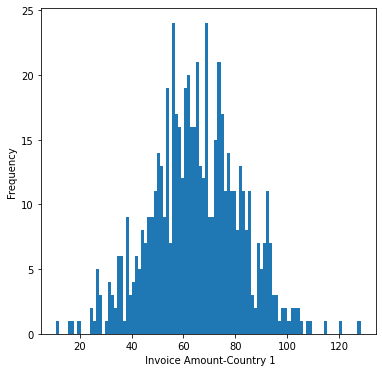

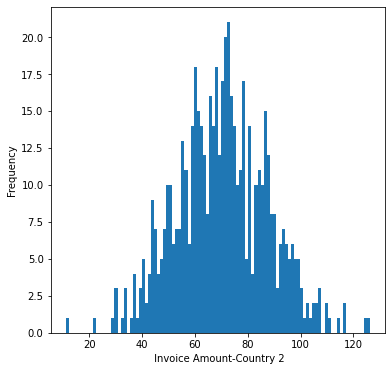

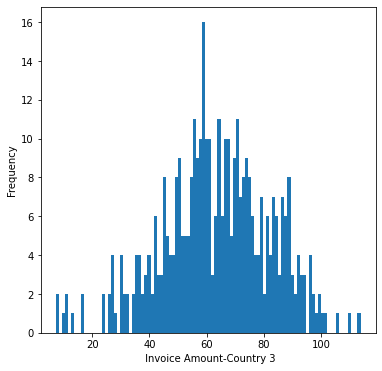

In [348]:
plt.figure(figsize=(6,6))
plt.hist(df1,bins=100)
plt.xlabel(" Invoice Amount-Country 1")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,6))
plt.hist(df2,bins=100)
plt.xlabel(" Invoice Amount-Country 2")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,6))
plt.hist(df3,bins=100)
plt.xlabel(" Invoice Amount-Country 3")
plt.ylabel("Frequency")
plt.show()


In [25]:
df1

0       55.94
2       65.88
15      61.96
23      26.44
25      72.70
        ...  
2453    68.07
2454    65.19
2458    38.95
2461    79.61
2462    38.25
Name: InvoiceAmount, Length: 616, dtype: float64

In [24]:
import seaborn as sns

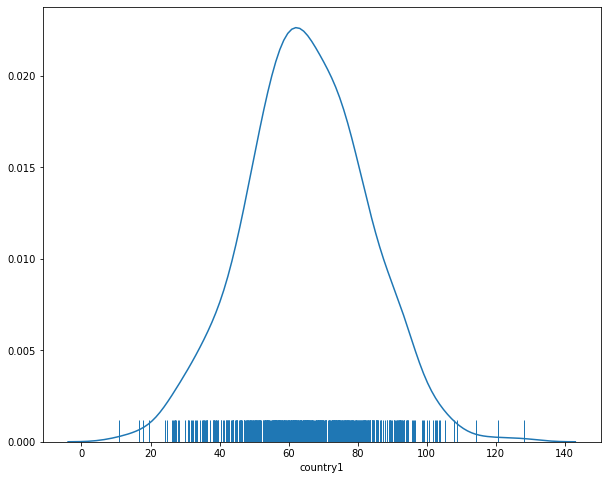

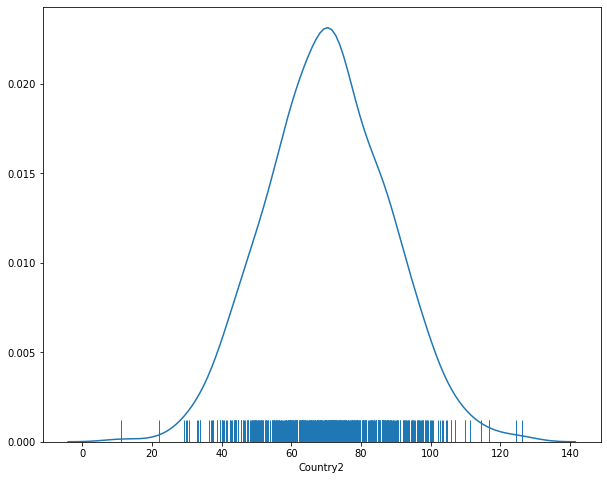

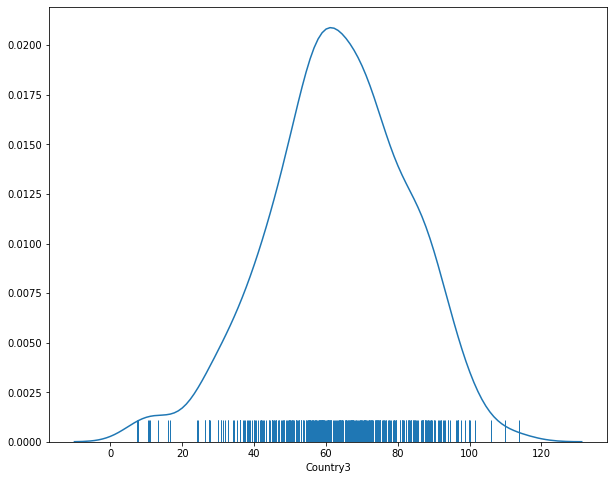

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(
  df1,
  rug=True,
  kde=True,
  hist=False,
  axlabel="country1"
)
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(
  df2,
    rug=True,
  kde=True,
  hist=False,
  axlabel="Country2"
)
plt.show()

plt.figure(figsize=(10,8))
sns.distplot(
  df3,
    rug=True,
  kde=True,
  hist=False,
  axlabel="Country3"
)
plt.show()

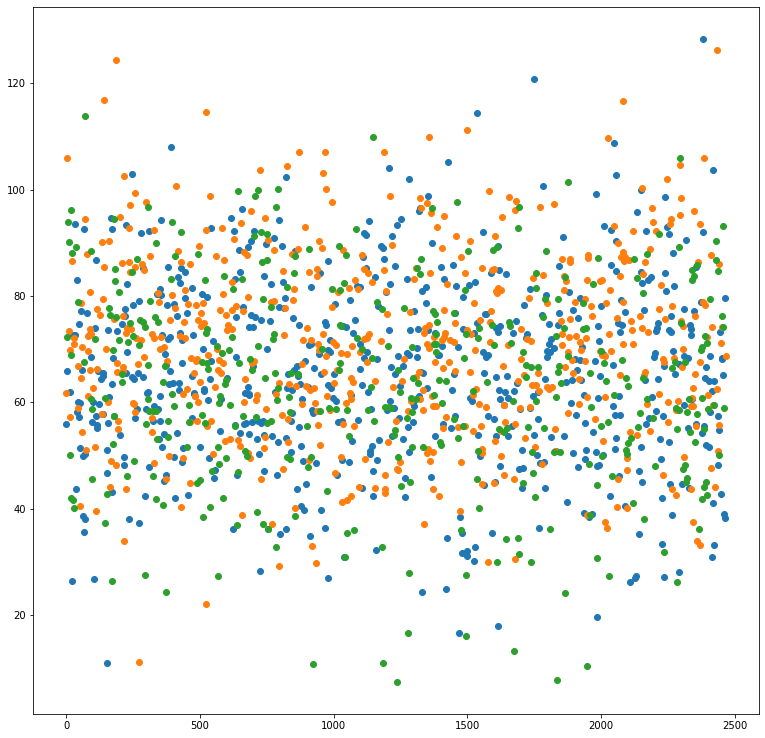

In [46]:
plt.figure(figsize=(13,13))
plt.scatter(df1.index,df1.values)
plt.scatter(df2.index,df2.values)
plt.scatter(df3.index,df3.values)

#### So yes there is not  much variation in the average invoice amounts of the top3 countries. We can see that by the distribution shown by the histogram. Pretty much all the three graphs are Gaussian distribution

### Question 2 <font color=grey>[1 pt]</font>

Does the invoice type (paper or electronic) have any impact on the number of days an invoice is paid late? Use one or more plots and at least one statistical measure to better present your conclusions.

Moreover, how would your conclusions in this question help management?

In [349]:
#CREATING DATAFRAME WITH INVOICE TYPE PAPER 
df_paper=dfInvoice[dfInvoice.PaperlessBill=='Paper']

In [350]:
#CREATING DATAFRAME WITH INVOICE TYPE ELECTRONIC 
df_electronic=dfInvoice[dfInvoice.PaperlessBill=='Electronic']

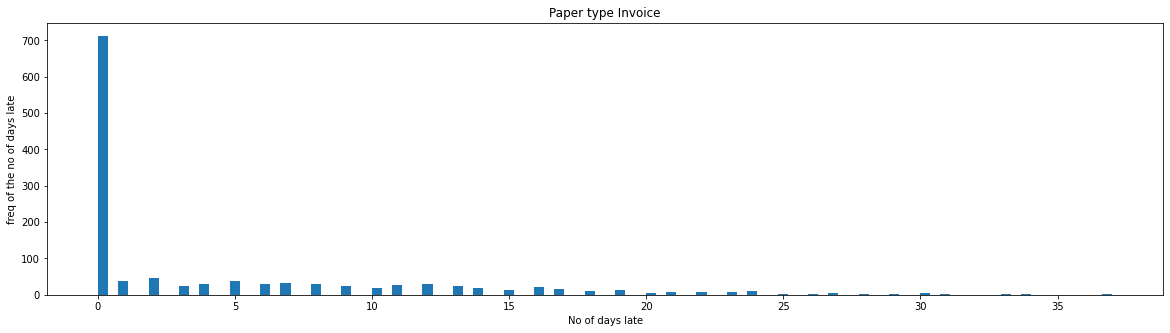

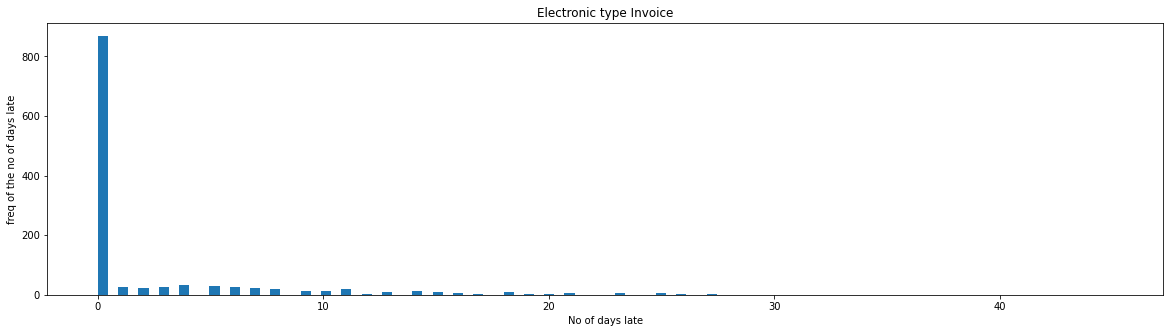

In [351]:
plt.figure(figsize=(20,5))
plt.hist(df_paper.DaysLate,bins=100)
plt.title("Paper type Invoice")
plt.xlabel("No of days late")
plt.ylabel("freq of the no of days late")
plt.show()

plt.figure(figsize=(20,5))
plt.hist(df_electronic.DaysLate,bins=100)
plt.title("Electronic type Invoice")
plt.xlabel("No of days late")
plt.ylabel("freq of the no of days late")
plt.show()

In [352]:
df_paper.DaysLate.value_counts()

0.0     712
2.0      45
1.0      39
5.0      38
7.0      33
6.0      31
8.0      31
4.0      29
12.0     29
11.0     28
3.0      24
9.0      24
13.0     23
16.0     21
10.0     19
14.0     18
17.0     17
15.0     13
19.0     13
18.0     11
24.0     10
21.0      8
23.0      8
22.0      7
20.0      6
30.0      5
27.0      4
25.0      3
34.0      3
26.0      2
28.0      2
29.0      2
33.0      1
31.0      1
37.0      1
Name: DaysLate, dtype: int64

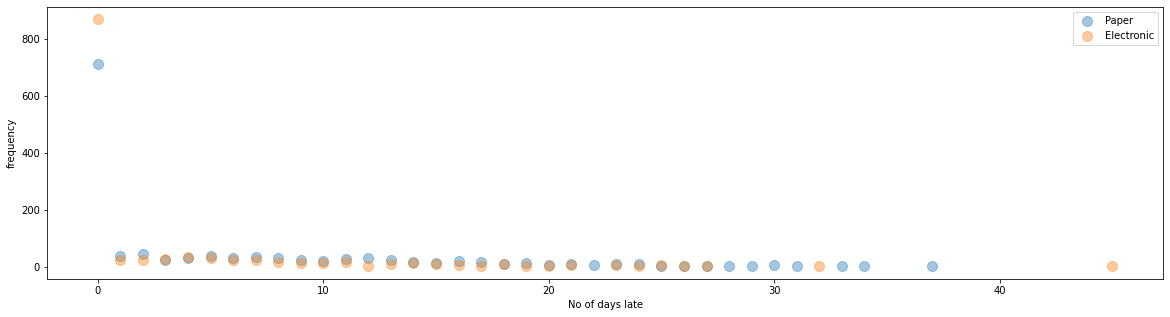

In [353]:
plt.figure(figsize=(20,5))
plt.scatter(df_paper.DaysLate.value_counts().index,df_paper.DaysLate.value_counts(),label='Paper',s=100,alpha=0.4)
plt.scatter(df_electronic.DaysLate.value_counts().index,df_electronic.DaysLate.value_counts(),label="Electronic",s=100,alpha=0.4)
plt.xlabel('No of days late')
plt.ylabel("frequency")
plt.legend()
plt.show()

From the graphs it seems that there is a little improvement of performance in Electronic type Invoice. The delays are less as seen from the graph

In [354]:
df_paper.DaysLate.value_counts().head()

0.0    712
2.0     45
1.0     39
5.0     38
7.0     33
Name: DaysLate, dtype: int64

In [355]:
df_electronic.DaysLate.value_counts().head()

0.0    869
4.0     33
5.0     31
3.0     27
6.0     25
Name: DaysLate, dtype: int64

Lets make a Dataframe to compare these values

In [356]:
df_comparison = pd.concat([df_electronic.DaysLate.value_counts(),df_paper.DaysLate.value_counts()],axis=1)

In [357]:
df_comparison.columns=['Electronic','Paper']

In [358]:
df_comparison

,Electronic,Paper
0.0,869.0,712.0
1.0,25.0,39.0
2.0,22.0,45.0
3.0,27.0,24.0
4.0,33.0,29.0
5.0,31.0,38.0
6.0,25.0,31.0
7.0,22.0,33.0
8.0,18.0,31.0
9.0,14.0,24.0


From the above dataframe we can compare the delays shown for particular days.
Lets check using mean to see average days of delay

In [359]:
int(df_paper.DaysLate.mean())

4

In [360]:
int(df_electronic.DaysLate.mean())

2

So we can see that Avg delay in Electronic was 2 whereas that in Paper was 4

#### From the above plots and comparisons we can see that the delays were less in electronic invoice type. There were rarely any delays of more than 25 days in electronic mails

#### So we can see the mean delay in electronic invoice type was lower by around 2 days. The most delays in paper type were 2 days whereas in electronic it was 4 days. Overall electronic invoice type performed really well.

#### We can take help from this insight and tell that Electronic Invoice is more effecient as it takes half days on average to be delayed

### Question 3 <font color=grey>[2 pts]</font>

Create a linear regression model to predict <b>whether an invoice will be late or not</b>. Use as many features as possible for the problem (i.e., no need to check for correlation or colinearity).

Calculate and discuss the resulting precision, recall, and accuracy. Would this model be useful in practice based on your evaluation?

<i>Note:</i> You can assume that the firm will not generate invoices for any other country codes.

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [362]:
dfInvoice.head()

,countryCode,customerID,invoiceNumber,InvoiceDate,InvoiceAmount,Disputed,PaperlessBill,DaysLate
0,391,0379-NEVHP,611365,1/2/2013,55.94,No,Paper,1.0
1,406,8976-AMJEO,7900770,1/26/2013,61.74,Yes,Electronic,6.0
2,391,2820-XGXSB,9231909,7/3/2013,65.88,No,Electronic,2.0
3,406,9322-YCTQO,9888306,2/10/2013,105.92,No,Electronic,5.0
4,818,6627-ELFBK,15752855,10/25/2012,72.27,Yes,Paper,4.0


Now as we are dealing with categorical variables, we need to convert them into integers so as to be trained by the model

In [363]:
dfInvoice.countryCode.unique()

array([391, 406, 818, 897, 770], dtype=int64)

In [364]:
#Lets initialize a new column with any random value
dfInvoice['Countries']=0
#Now based on Country code we will alter the value in countries columns

In [365]:
dfInvoice.Countries=np.where(dfInvoice.countryCode==391,1,dfInvoice.Countries)
dfInvoice.Countries=np.where(dfInvoice.countryCode==406,2,dfInvoice.Countries)
dfInvoice.Countries=np.where(dfInvoice.countryCode==818,3,dfInvoice.Countries)
dfInvoice.Countries=np.where(dfInvoice.countryCode==897,4,dfInvoice.Countries)
dfInvoice.Countries=np.where(dfInvoice.countryCode==770,5,dfInvoice.Countries)

In [366]:
dfInvoice.head()

,countryCode,customerID,invoiceNumber,InvoiceDate,InvoiceAmount,Disputed,PaperlessBill,DaysLate,Countries
0,391,0379-NEVHP,611365,1/2/2013,55.94,No,Paper,1.0,1
1,406,8976-AMJEO,7900770,1/26/2013,61.74,Yes,Electronic,6.0,2
2,391,2820-XGXSB,9231909,7/3/2013,65.88,No,Electronic,2.0,1
3,406,9322-YCTQO,9888306,2/10/2013,105.92,No,Electronic,5.0,2
4,818,6627-ELFBK,15752855,10/25/2012,72.27,Yes,Paper,4.0,3


Similarly for Disputed, Paperless and DaysLate column, we will do the same work

In [367]:
# if there is a dispute then we assign 1 else 0
dfInvoice['Dispute']=np.where(dfInvoice.Disputed=='Yes',1,0)

# if invoice type is paper then we assign 1 else 0
dfInvoice['Paper']=np.where(dfInvoice.PaperlessBill=="Paper",1,0)

#if the invoice is delayed then we assign 1 else 0
dfInvoice['Late']=np.where(dfInvoice.DaysLate>0,1,0)

In [368]:
dfInvoice

,countryCode,customerID,invoiceNumber,InvoiceDate,InvoiceAmount,Disputed,PaperlessBill,DaysLate,Countries,Dispute,Paper,Late
0,391,0379-NEVHP,611365,1/2/2013,55.94,No,Paper,1.0,1,0,1,1
1,406,8976-AMJEO,7900770,1/26/2013,61.74,Yes,Electronic,6.0,2,1,0,1
2,391,2820-XGXSB,9231909,7/3/2013,65.88,No,Electronic,2.0,1,0,0,1
3,406,9322-YCTQO,9888306,2/10/2013,105.92,No,Electronic,5.0,2,0,0,1
4,818,6627-ELFBK,15752855,10/25/2012,72.27,Yes,Paper,4.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,9982796720,10/18/2013,79.61,No,Electronic,14.0,1,0,0,1
2462,391,9841-XLGBV,9983237240,9/19/2012,38.25,No,Paper,0.0,1,0,1,0
2463,770,7856-ODQFO,9986249860,7/2/2012,67.59,No,Paper,0.0,5,0,1,0
2464,770,7050-KQLDO,9989225541,4/27/2012,53.16,No,Paper,0.0,5,0,1,0


Now lets proceed to create X and Y 

In [369]:
X=dfInvoice[['Countries','Dispute','Paper','InvoiceAmount']]

In [370]:
Y=dfInvoice.Late

Splitting data in Training and testing

In [371]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

Lets begin making our model

In [372]:
model=LinearRegression()

In [373]:
model.fit(x_train,y_train)

LinearRegression()

In [374]:
y_pred=model.predict(x_test)

In [375]:
y_pred

array([0.10593424, 0.34457724, 0.11678564, 0.1125475 , 0.16399239,
       0.19722211, 0.17019067, 0.16489076, 0.36901494, 0.72824919,
       0.1807573 , 0.13078916, 0.35507323, 0.38236072, 0.20682856,
       0.23808484, 0.33977402, 0.31177793, 0.23356416, 0.78439135,
       0.74680212, 0.35638446, 0.22676547, 0.20470949, 0.36816296,
       0.71837786, 0.18445248, 0.38712863, 0.61966868, 0.33033969,
       0.28876837, 0.3057121 , 0.2926445 , 0.1376055 , 0.36773914,
       0.36437512, 0.40885792, 0.15882492, 0.29000449, 0.3316023 ,
       0.1562114 , 0.32579252, 0.36028261, 0.11848973, 0.40272145,
       0.61741717, 0.58269751, 0.6269883 , 0.30489319, 0.12775183,
       0.32679248, 0.72935511, 0.22712748, 0.29730645, 0.28870656,
       0.57468695, 0.60284409, 0.12275436, 0.12033509, 0.18498661,
       0.33310331, 0.16566999, 0.12837872, 0.78113988, 0.19333491,
       0.35199175, 0.33774984, 0.80180751, 0.57052828, 0.36268869,
       0.75817446, 0.40500828, 0.29486952, 0.1948889 , 0.15333

y_pred has continuous values. We have to convert it to 0 and 1 for checking how good our model is

In [376]:
# if the value predicted is greater than 0.5, we save it as 1 and else 0
updated_pred=[]
for i in y_pred:
    if i>0.5:
        updated_pred.append(1)
    else:
        updated_pred.append(0)
    

In [377]:
print(classification_report(updated_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       386
           1       0.40      0.66      0.50       107

    accuracy                           0.71       493
   macro avg       0.64      0.69      0.65       493
weighted avg       0.78      0.71      0.73       493



#### The model works pretty good as we can see from the above stats. But in my opinion Using classification algorithms would be much  better

#### Acc to me, this is a very good model due to high precision, but In my opinion using tree based classification may be slightly better

### Question 4 <font color=grey>[2 pts]</font>

We will now investigate different approaches for answering Q3. 

Create three classification models (a logistic regression, a decision tree, and a random forest) that <b>predict whether an invoice payment will be late or not</b>. 

Compare the precision, recall, and accuracy for these three models in this classification task, giving examples for scenarios where you would use each of the models. Which one is more benefitial for this application?

Finally, are these models more beneficial than the linear regression you constructed in <b>Q3</b>? 

<i>Note:</i> Similar to Q3, you can assume that the firm will not generate invoices for any other country codes. For decision trees, use 150 as the minimum sample size for each tree node. For the random forest, use 100 decision trees with 20 minimum sample size for each tree node. Use a random_state=0 when appropriate.

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Firstly lets try with random_state=0

In [379]:
log_reg=LogisticRegression(random_state=0)
dtree=DecisionTreeClassifier(min_samples_leaf=150,random_state=0)
rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=20,random_state=0)

In [380]:
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [381]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=150, random_state=0)

In [382]:
rf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=20, random_state=0)

In [383]:
print(log_reg.score(x_test,y_test))
print(dtree.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.7079107505070994
0.7099391480730223
0.7018255578093306


In [384]:
#logistic reg
print(classification_report(log_reg.predict(x_test),y_test))

print("Confusion matrix")

print(confusion_matrix(log_reg.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       387
           1       0.39      0.66      0.49       106

    accuracy                           0.71       493
   macro avg       0.64      0.69      0.64       493
weighted avg       0.78      0.71      0.73       493

Confusion matrix
[[279 108]
 [ 36  70]]


In [385]:
#Decision Tree
print(classification_report(dtree.predict(x_test),y_test))
print("Confusion matrix")

print(confusion_matrix(dtree.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       386
           1       0.40      0.66      0.50       107

    accuracy                           0.71       493
   macro avg       0.64      0.69      0.65       493
weighted avg       0.78      0.71      0.73       493

Confusion matrix
[[279 107]
 [ 36  71]]


In [386]:
#randomforest
print(classification_report(rf.predict(x_test),y_test))

print("Confusion matrix")

print(confusion_matrix(rf.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       386
           1       0.39      0.64      0.48       107

    accuracy                           0.70       493
   macro avg       0.63      0.68      0.64       493
weighted avg       0.77      0.70      0.72       493

Confusion matrix
[[277 109]
 [ 38  69]]


Now lets try without random_state=0

In [387]:
log_reg=LogisticRegression()
dtree=DecisionTreeClassifier(min_samples_leaf=150)
rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=20)

In [388]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [389]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=150)

In [390]:
rf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=20)

In [391]:
print(log_reg.score(x_test,y_test))
print(dtree.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.7079107505070994
0.7099391480730223
0.7079107505070994


In [392]:
#logistic reg
print(classification_report(log_reg.predict(x_test),y_test))

print("Confusion matrix")

print(confusion_matrix(log_reg.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       387
           1       0.39      0.66      0.49       106

    accuracy                           0.71       493
   macro avg       0.64      0.69      0.64       493
weighted avg       0.78      0.71      0.73       493

Confusion matrix
[[279 108]
 [ 36  70]]


In [393]:
#Decision Tree
print(classification_report(dtree.predict(x_test),y_test))

print("Confusion matrix")

print(confusion_matrix(dtree.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       386
           1       0.40      0.66      0.50       107

    accuracy                           0.71       493
   macro avg       0.64      0.69      0.65       493
weighted avg       0.78      0.71      0.73       493

Confusion matrix
[[279 107]
 [ 36  71]]


In [394]:
#randomforest
print(classification_report(rf.predict(x_test),y_test))

print("Confusion matrix")

print(confusion_matrix(rf.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       389
           1       0.39      0.66      0.49       104

    accuracy                           0.71       493
   macro avg       0.64      0.69      0.64       493
weighted avg       0.78      0.71      0.73       493

Confusion matrix
[[280 109]
 [ 35  69]]


#### By seeing the above classification  reports, we can see that Logistic regression, Decision Trees and Random Forest gave similar results. But all of them were better than the results of Linear Regression 

#### Hence they will be more useful to perfom predictions

### Question 5 <font color=grey>[1 pt]</font>

Every time an invoice is delayed, the firm loses a fixed amount of \\$10 due to processing and related charges (e.g., for contacting the customer). To help ameliorate this cost, the firm wishes to implement a new program to incentivize customers not to delay their payments. Specifically, the firm will give a gift card valued in \\$5 on selected invoices if they are paid on time. 

If the firm uses your random forest from <b>Q4</b> to decide which of the future 1,000 invoices to apply the promotion to, is this strategy more benefitial than not doing anything? If so, how much money in percentage is saved by the firm?

For this question, assume that (a) an invoice is never paid late when the promotion is applied and that (b) the proportion of late invoices will remain the same as the one observed in the dataset.

In [395]:
# We import random module to create a sample of 1000 data points to simulate what would occur if we applied the promotion
import random
from random import sample

In [396]:
# Storing x_test values in a sample dataset
temp=x_test

##### Here we are creating random samples of length 1000 for checking out how our promo strategy works


In [397]:
# sample function used to generate 1000 data points based on the existing points
temp=temp.sample(1000,replace=True)

In [398]:
temp.head()

,Countries,Dispute,Paper,InvoiceAmount
930,4,0,0,9.52
327,2,0,0,92.35
763,5,0,1,65.81
1316,1,0,1,73.84
2396,3,0,1,42.62


Now suppose we consider the temp dataframe to be out future features of the invoices

By using random forest we can predict for each of these 1000 values that there will be a delay or not

##### Here we predicted the 1000 outputs by random forest.

In [399]:
rf.predict(temp)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

##### We create a new dataframe for the predicted variables

In [400]:
pred_df=pd.DataFrame(rf.predict(temp),columns=['Prediction'])

In [401]:
pred_df

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


We add the price column from temp so that we can calculate how much profit or loss would occur by the promotion strategy

In [402]:
pred_df['Price']=temp.InvoiceAmount.values

In [403]:
pred_df.head()

,Prediction,Price
0,0,9.52
1,0,92.35
2,0,65.81
3,0,73.84
4,0,42.62


### If promotion is not applied

###### If promo is not applied,on each delay will cause a spending of additional 10$. So here we calculate net profit for all the samples

In [404]:
# creating  a loop that checks if a delay would occur or not, and spend 10$ for expenses if delay occurs
total_profit=0
for i in pred_df.values:
    if i[0]==0:
        total_profit=total_profit+float(i[1])  #adding the price to the total_prof because no delay
    else:
        total_profit=total_profit+float(i[1])-10 #cutting 10$ from the price because of further expenses given

In [405]:
total_profit

57630.87999999999

### If promo is applied

##### If promo is applied, every potential delay would  be compensated by providing 5$ gift cards to prevent delay

In [406]:
# creating  a loop that checks if a delay would occur or not, and apply the promo if delay is likely
total_profit2=0
for i in pred_df.values:
    if i[0]==0:
        total_profit2=total_profit2+float(i[1]) #adding the price to the total_prof because no delay
    else:
        total_profit2=total_profit2+float(i[1])-5 #here we apply promo strategy. this would cost 5$ so we cut it from total

In [407]:
total_profit2

58745.88

In [408]:
netprofit_by_promo=total_profit2-total_profit

In [409]:
print(netprofit_by_promo)

1115.0000000000073


In [410]:
print(f"Net Profit generated is {netprofit_by_promo}$")

Net Profit generated is 1115.0000000000073$


We were able to gain profits by applying this promo strategy and hence